# PolitiCS Project!

Topic: How have US states’ incarceration rates correlated with COVID-19 outbreaks in their prison systems?

* Data sets: https://www.kaggle.com/christophercorrea/prisoners-and-crime-in-united-states
* https://www.recidiviz.org/covid/datasets
* https://data.world/associatedpress/marshall-project-covid-cases-in-prisons
* (data files are already loaded in directory)

Import useful libraries: 

In [1]:
# first let's import the standard libraries we've been working with

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we're going to load the important .csv files to figure out what we need and what we don't:

In [2]:
#bring in the csv's
covid_cases = pd.read_csv('covid_prison_cases.csv')
prison_populations = pd.read_csv('prison_populations.csv')
staff_populations = pd.read_csv('staff_populations.csv')
crime_and_incarceration = pd.read_csv('crime_and_incarceration_by_state.csv')
#Visualize the data sets to get an idea of what we need and what we don't
covid_cases.head(5)

,name,abbreviation,staff_tests,staff_tests_with_multiples,prisoner_tests,prisoner_tests_with_multiples,total_staff_cases,total_prisoner_cases,staff_recovered,prisoners_recovered,total_staff_deaths,total_prisoner_deaths,as_of_date,notes
0,Alabama,AL,NaN,NaN,2797.0,NaN,411.0,439.0,364.0,381.0,2.0,25.0,10/05/2020,NaN
1,Alaska,AK,NaN,NaN,NaN,6133.0,34.0,82.0,NaN,NaN,0.0,0.0,10/07/2020,NaN
2,Arizona,AZ,NaN,NaN,40290.0,NaN,710.0,2599.0,697.0,2557.0,NaN,28.0,10/06/2020,NaN
3,Arkansas,AR,5114.0,NaN,17583.0,NaN,399.0,6606.0,399.0,6093.0,2.0,45.0,10/06/2020,NaN
4,California,CA,NaN,NaN,94805.0,NaN,3793.0,14870.0,2850.0,12686.0,10.0,69.0,10/06/2020,NaN


In [3]:
prison_populations.head(5)

,name,abbreviation,march_pop,april_pop,june_pop,july_pop,aug_pop,as_of_date_march,as_of_date_april,as_of_date_june,as_of_date_july,as_of_date_aug
0,Alabama,AL,21114,20655,19752,19342,19342,03/31/2020,04/30/2020,06/30/2020,07/31/2020,07/31/2020
1,Alaska,AK,4776,4277,4216,4334,4414,03/15/2020,04/15/2020,06/16/2020,07/31/2020,08/31/2020
2,Arizona,AZ,42360,41777,40529,39626,39422,03/31/2020,04/15/2020,06/16/2020,07/31/2020,08/31/2020
3,Arkansas,AR,17501,17502,16473,15736,15736,03/15/2020,04/15/2020,06/16/2020,07/31/2020,07/31/2020
4,California,CA,117639,113632,109800,102715,97342,03/11/2020,04/15/2020,06/17/2020,07/29/2020,09/02/2020


In [4]:
staff_populations.head(5)

,name,abbreviation,april_pop,as_of_date,notes
0,Alabama,AL,6259.0,9/30/2019,The staff number is from Sept. 2019. It repres...
1,Alaska,AK,NaN,NaN,NaN
2,Arizona,AZ,8700.0,5/11/2020,NaN
3,Arkansas,AR,4045.0,2/29/2020,NaN
4,California,CA,46000.0,4/15/2020,"CDCR's pio says that it's roughly 46,000 for b..."


The data set with the most useful data appears to be covid_prison_cases.csv and prison_populations.csv, although certain staff populations could be useful later in analyzing staff positive tests. 

For now, lets remove NaN values (filling with 0 in the case that data is not available) and removing some unecessary columns 

In [5]:
covid_cases = covid_cases.drop(columns=['staff_tests_with_multiples', 'prisoner_tests_with_multiples', 'notes'])
covid_cases = covid_cases.fillna(0)
crime_and_incarceration = crime_and_incarceration[crime_and_incarceration["year"]>=2016]
prison_populations = prison_populations.fillna(0)
staff_populations = staff_populations.fillna(0)

In [6]:
covid_cases.isna().sum()

name                     0
abbreviation             0
staff_tests              0
prisoner_tests           0
total_staff_cases        0
total_prisoner_cases     0
staff_recovered          0
prisoners_recovered      0
total_staff_deaths       0
total_prisoner_deaths    0
as_of_date               0
dtype: int64

In [7]:
crime_and_incarceration['incarceration'] = crime_and_incarceration.prisoner_count 
                                            
crime_and_incarceration.head(5)

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,incarceration
765,FEDERAL,False,2016,188311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188311
766,ALABAMA,False,2016,23745,False,False,4860545.0,25878.0,407.0,NaN,1915.0,4687.0,18869.0,143259.0,34045.0,97498.0,11716.0,23745
767,ALASKA,True,2016,4378,False,False,741522.0,5966.0,52.0,NaN,1053.0,850.0,4011.0,24876.0,4053.0,17766.0,3057.0,4378
768,ARIZONA,False,2016,42248,False,False,6908642.0,32542.0,389.0,NaN,3304.0,7045.0,21804.0,207317.0,38216.0,150618.0,18483.0,42248
769,ARKANSAS,False,2016,15833,False,False,2988231.0,16563.0,217.0,NaN,2214.0,2125.0,12007.0,98092.0,23814.0,67091.0,7187.0,15833


consolidate state data into single rows; i.e. one row for alabama with the mean of its incarceration_rate data

In [8]:
crime_and_incarceration = crime_and_incarceration[crime_and_incarceration.jurisdiction != "FEDERAL"]
new_incarceration_rates = crime_and_incarceration.groupby("jurisdiction").agg("mean")[["prisoner_count", "state_population", "incarceration"]]
new_incarceration_rates.head(10)



,prisoner_count,state_population,incarceration
jurisdiction,,,
ALABAMA,23745,4860545.0,23745
ALASKA,4378,741522.0,4378
ARIZONA,42248,6908642.0,42248
ARKANSAS,15833,2988231.0,15833
CALIFORNIA,129416,39296476.0,129416
COLORADO,19486,5530105.0,19486
CONNECTICUT,15040,3587685.0,15040
DELAWARE,6334,952698.0,6334
FLORIDA,98010,20656589.0,98010


In [9]:
covid_cases = covid_cases.rename(columns={"name": "jurisdiction"})
covid_cases["jurisdiction"] = covid_cases["jurisdiction"].str.upper() 
new_covid_data = covid_cases.groupby("jurisdiction").agg("mean")[["total_prisoner_cases"]]

joined = new_incarceration_rates.join(new_covid_data, on="jurisdiction")
#joined['total_prisoner_cases'] = ((joined.total_prisoner_cases 
                                           #       / joined.prisoner_count) * 100000)
joined.head(5)

,prisoner_count,state_population,incarceration,total_prisoner_cases
jurisdiction,,,,
ALABAMA,23745,4860545.0,23745,150.724138
ALASKA,4378,741522.0,4378,18.620690
ARIZONA,42248,6908642.0,42248,895.379310
ARKANSAS,15833,2988231.0,15833,2928.000000
CALIFORNIA,129416,39296476.0,129416,5567.275862


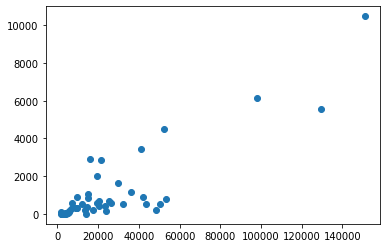

In [17]:
plt.scatter(joined["prisoner_count"], joined["total_prisoner_cases"])
plt.show()

In [19]:
np.corrcoef(joined["prisoner_count"], joined["total_prisoner_cases"])

array([[1.        , 0.86644066],
       [0.86644066, 1.        ]])

In [15]:
joined = joined.sort_values(by = "total_prisoner_cases", ascending=False)

In [16]:
joined

,prisoner_count,state_population,incarceration,total_prisoner_cases
jurisdiction,,,,
TEXAS,151276,27904862.0,151276,10481.275862
FLORIDA,98010,20656589.0,98010,6137.310345
CALIFORNIA,129416,39296476.0,129416,5567.275862
OHIO,52172,11622554.0,52172,4484.862069
MICHIGAN,41122,9933445.0,41122,3448.655172
ARKANSAS,15833,2988231.0,15833,2928.000000
TENNESSEE,21539,6649404.0,21539,2867.620690
NEW JERSEY,19458,8978416.0,19458,1999.896552
VIRGINIA,29882,8414380.0,29882,1626.517241
